In [1]:
%%HTML
<h1>Import Data</h1>

In [2]:
import pandas as pd
df1 = pd.read_csv('./data/210730_HNX_ALL.txt', sep = ',')
df2 = pd.read_csv('./data/210730_HOSE_ALL.txt', sep = ',')
df3 = pd.read_csv('./data/210730_Index_ALL.txt', sep = ',')

frames = [df1, df2, df3]
df = pd.concat(frames, ignore_index = True)
df.head()

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
0,AAV,20210730,12.4,12.4,12.1,12.4,166400
1,ABT,20210730,26.0,27.2,26.0,27.1,1207
2,ACM,20210730,2.3,2.4,2.3,2.4,592463
3,ADC,20210730,21.5,21.5,21.5,21.5,0
4,ALT,20210730,12.7,12.7,12.7,12.7,0


In [3]:
%%HTML
<h1>Extract Data</h1>

In [4]:
#Remove redundant characters
df.columns=df.columns.str.replace('[<,>]','', regex=True)
print(df)

          Ticker  DTYYYYMMDD   Open    High     Low   Close  Volume
0            AAV    20210730   12.4   12.40   12.10   12.40  166400
1            ABT    20210730   26.0   27.20   26.00   27.10    1207
2            ACM    20210730    2.3    2.40    2.30    2.40  592463
3            ADC    20210730   21.5   21.50   21.50   21.50       0
4            ALT    20210730   12.7   12.70   12.70   12.70       0
...          ...         ...    ...     ...     ...     ...     ...
1452735  VNINDEX    20030609  152.0  152.49  152.35  152.35       0
1452736  VNINDEX    20030602  151.0  151.66  151.44  151.66       0
1452737  VNINDEX    20030530  152.0  152.47  152.24  152.24       0
1452738  VNINDEX    20030529  153.0  152.74  152.32  152.32       0
1452739  VNINDEX    20020314  189.0  188.97  188.97  188.97       0

[1452740 rows x 7 columns]


In [5]:
#Drop duplicate records
df_modified = df.drop_duplicates(subset = ['Ticker', 'DTYYYYMMDD'], keep = 'first')
print(df_modified)

          Ticker  DTYYYYMMDD   Open    High     Low   Close  Volume
0            AAV    20210730   12.4   12.40   12.10   12.40  166400
1            ABT    20210730   26.0   27.20   26.00   27.10    1207
2            ACM    20210730    2.3    2.40    2.30    2.40  592463
3            ADC    20210730   21.5   21.50   21.50   21.50       0
4            ALT    20210730   12.7   12.70   12.70   12.70       0
...          ...         ...    ...     ...     ...     ...     ...
1452735  VNINDEX    20030609  152.0  152.49  152.35  152.35       0
1452736  VNINDEX    20030602  151.0  151.66  151.44  151.66       0
1452737  VNINDEX    20030530  152.0  152.47  152.24  152.24       0
1452738  VNINDEX    20030529  153.0  152.74  152.32  152.32       0
1452739  VNINDEX    20020314  189.0  188.97  188.97  188.97       0

[1452727 rows x 7 columns]


In [6]:
#Pivot the table
data = df_modified.pivot(index='DTYYYYMMDD', columns='Ticker', values = 'Close')
print(data)

Ticker        AAA   AAM   AAT   AAV    ABS   ABT    ACB    ACC    ACL  ACM  \
DTYYYYMMDD                                                                   
20020314      NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN  NaN   
20030529      NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN  NaN   
20030530      NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN  NaN   
20030602      NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN  NaN   
20030609      NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN  NaN   
...           ...   ...   ...   ...    ...   ...    ...    ...    ...  ...   
20210726    15.45  10.8  17.5  12.4  18.55  27.6  32.70  14.00  11.40  2.3   
20210727    16.00  10.5  17.7  12.4  18.90  27.6  33.15  13.70  11.60  2.3   
20210728    16.30  10.1  17.6  12.4  19.35  27.0  33.15  13.70  11.60  2.3   
20210729    16.15  10.8  17.6  12.4  19.95  27.0  34.15  13.70  11.50  2.3   
20210730    16.15  10.9  17.6  12.4  20.40  27.1  36.15  13.75  

In [7]:
%%HTML
<h1>Filter Data</h1>

In [8]:
%%HTML
<h3>Here we only consider data between 02/01/2018 and 28/12/2018 (a total of 250 days)</h3>

In [9]:
data = data.loc[20180102:20181228]
print(data)

Ticker         AAA    AAM  AAT    AAV  ABS     ABT     ACB     ACC     ACL  \
DTYYYYMMDD                                                                   
20180102    21.245  6.506  NaN    NaN  NaN  23.750  14.502  11.121   3.425   
20180103    21.310  6.286  NaN    NaN  NaN  23.673  14.465  11.287   3.304   
20180104    21.213  6.286  NaN    NaN  NaN  24.133  14.502  11.342   3.405   
20180105    21.083  6.569  NaN    NaN  NaN  23.980  14.502  11.342   3.385   
20180108    21.698  6.537  NaN    NaN  NaN  23.520  14.988  11.287   3.162   
...            ...    ...  ...    ...  ...     ...     ...     ...     ...   
20181224    13.040  9.014  NaN  7.893  NaN  36.541  13.710  13.221  13.201   
20181225    12.776  9.117  NaN  7.893  NaN  34.629  13.615  13.221  12.365   
20181226    12.776  9.186  NaN  7.893  NaN  33.609  13.568  13.221  12.429   
20181227    13.128  9.048  NaN  7.972  NaN  35.946  13.899  13.221  12.858   
20181228    12.952  9.186  NaN  7.972  NaN  34.161  13.993  13.2

In [10]:
%%HTML
<h1>Clean Data</h1>

In [11]:
pd.set_option('display.precision', 3)

In [12]:
#Check for missing values
data.isnull().values.any()

True

<AxesSubplot:>

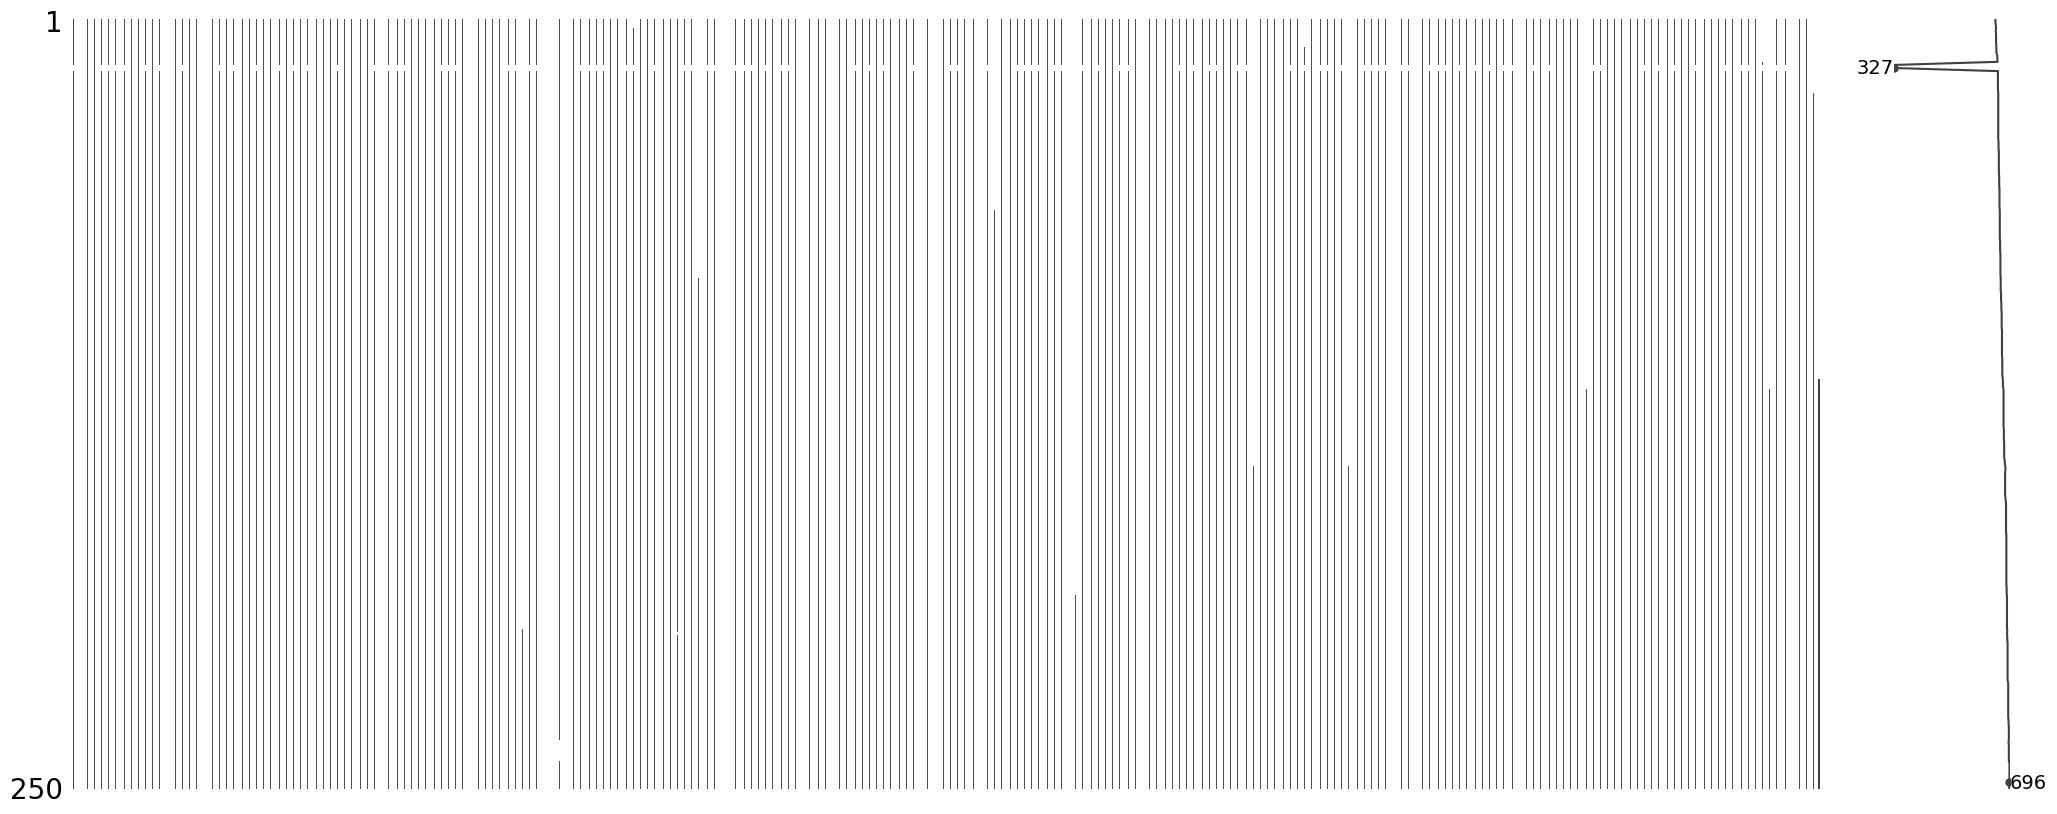

In [13]:
#Plot the missing value matrix
import missingno
missingno.matrix(data)

In [14]:
%%HTML
<h3>We shall remove all the columns with more than 20% of missing data</h3>

In [15]:
print('Data Shape before cleaning =', data.shape)

missing_percentage = data.isnull().mean().sort_values(ascending=False)
dropped_list = sorted(list(missing_percentage[missing_percentage > 0.2].index))
data.drop(labels=dropped_list, axis=1, inplace=True)

print('Data Shape after cleaning =', data.shape)

Data Shape before cleaning = (250, 755)
Data Shape after cleaning = (250, 662)


In [16]:
#Fill the remaining missing values with already available values
data = data.fillna(method='ffill')
data = data.fillna(method='bfill')
print(data)

Ticker         AAA    AAM     ABT     ACB     ACC     ACL  ACM     ADC  \
DTYYYYMMDD                                                               
20180102    21.245  6.506  23.750  14.502  11.121   3.425  1.7   8.951   
20180103    21.310  6.286  23.673  14.465  11.287   3.304  1.6   9.007   
20180104    21.213  6.286  24.133  14.502  11.342   3.405  1.6   9.007   
20180105    21.083  6.569  23.980  14.502  11.342   3.385  1.5   9.007   
20180108    21.698  6.537  23.520  14.988  11.287   3.162  1.6   9.007   
...            ...    ...     ...     ...     ...     ...  ...     ...   
20181224    13.040  9.014  36.541  13.710  13.221  13.201  0.7  11.034   
20181225    12.776  9.117  34.629  13.615  13.221  12.365  0.7  11.034   
20181226    12.776  9.186  33.609  13.568  13.221  12.429  0.8  11.034   
20181227    13.128  9.048  35.946  13.899  13.221  12.858  0.7  11.034   
20181228    12.952  9.186  34.161  13.993  13.221  12.858  0.7  11.034   

Ticker         ADS    AGM  ...     VT

In [17]:
%%HTML
<h1>Calculate Parameters</h1>

In [18]:
import numpy as np

#Calculate returns and create a data frame
returns = data.pct_change().mean()*250
returns = pd.DataFrame(returns)
returns.columns = ['returns']

#Calculate the volatility
returns['volatility'] = data.pct_change().std()*np.sqrt(250)
data1 = data
data = returns
print(data)

        returns  volatility
Ticker                     
AAA      -0.417       0.400
AAM       0.425       0.398
ABT       0.480       0.480
ACB       0.047       0.407
ACC       0.221       0.308
...         ...         ...
VTV      -0.121       0.543
VXB       0.406       0.559
WCS      -0.049       0.492
WSS      -0.203       0.414
X20      -0.484       0.618

[662 rows x 2 columns]


In [19]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=["returns", "volatility"], how="all", inplace=True)
print(data)

        returns  volatility
Ticker                     
AAA      -0.417       0.400
AAM       0.425       0.398
ABT       0.480       0.480
ACB       0.047       0.407
ACC       0.221       0.308
...         ...         ...
VTV      -0.121       0.543
VXB       0.406       0.559
WCS      -0.049       0.492
WSS      -0.203       0.414
X20      -0.484       0.618

[661 rows x 2 columns]


In [20]:
%%HTML
<h1>Scale The Data</h1>

In [21]:
from sklearn.preprocessing import StandardScaler

#Prepare the scaler
scale = StandardScaler().fit(data)

#Fit the scaler
scaled_data = pd.DataFrame(scale.fit_transform(data),columns = data.columns, index = data.index)
X = scaled_data
X.head()

,returns,volatility
Ticker,,
AAA,-1.129,-0.342
AAM,0.955,-0.353
ABT,1.090,0.159
ACB,0.018,-0.300
ACC,0.450,-0.916


In [22]:
%%HTML
<h1>K-Means Clustering</h1>

In [23]:
%%HTML
<h3>We shall obtain the number of k clusters we should use using the elbow method</h3>

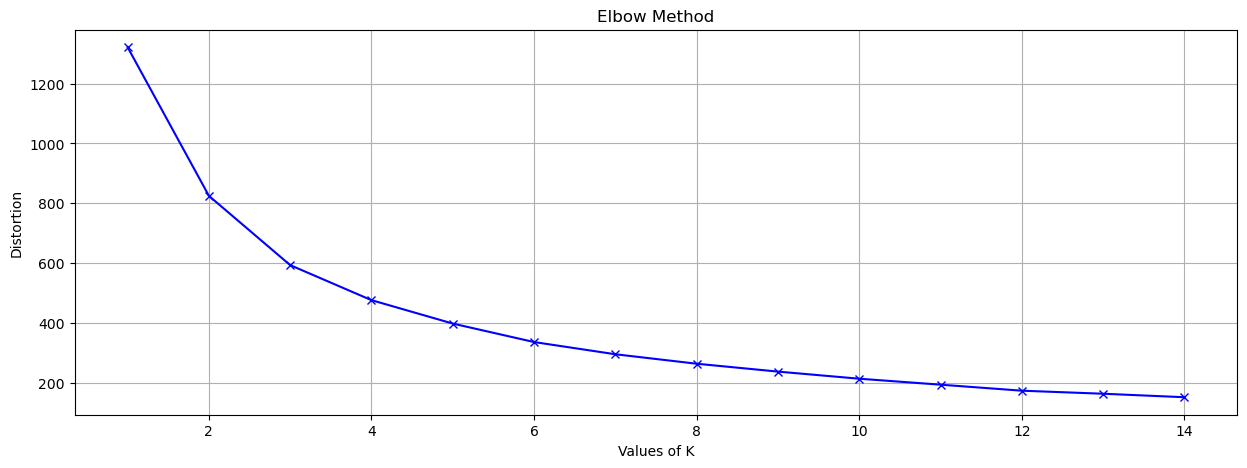

In [24]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

K = range(1,15)
distortions = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [25]:
from kneed import KneeLocator
kl = KneeLocator(K, distortions, curve="convex", direction="decreasing")
kl.elbow

4

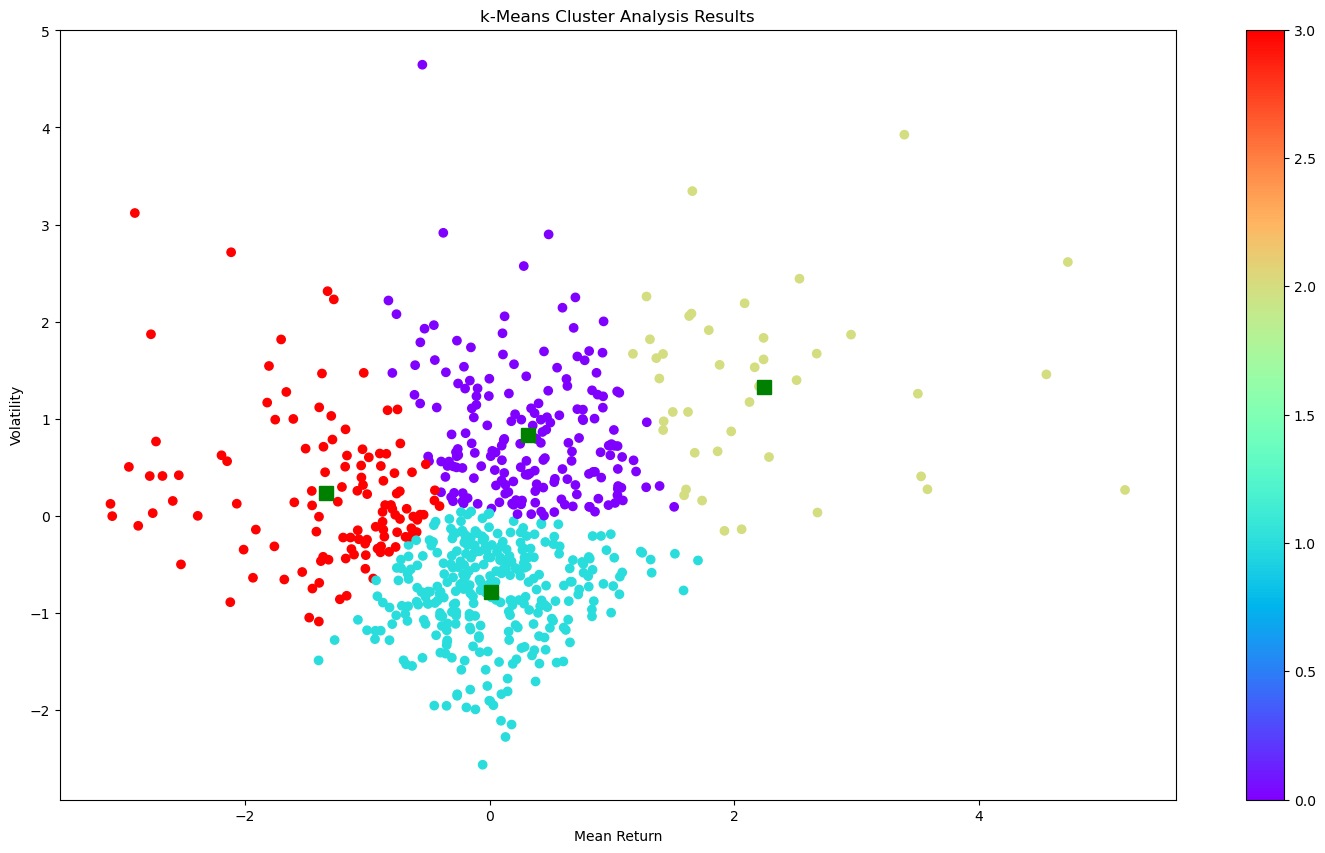

In [26]:
c = 4
#Fit the model
k_means = KMeans(n_clusters=c)
k_means.fit(X)
prediction = k_means.predict(X)

#Plot the results
centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = X.index)
ax.set_title('k-Means Cluster Analysis Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=10)
plt.show()

In [27]:
%%HTML
<h1>Hierarchical Clustering</h1>

In [28]:
%%HTML
<h3>As we want to minimize the variance distance between our clusters we shall go with the Ward’s linkage method</h3>

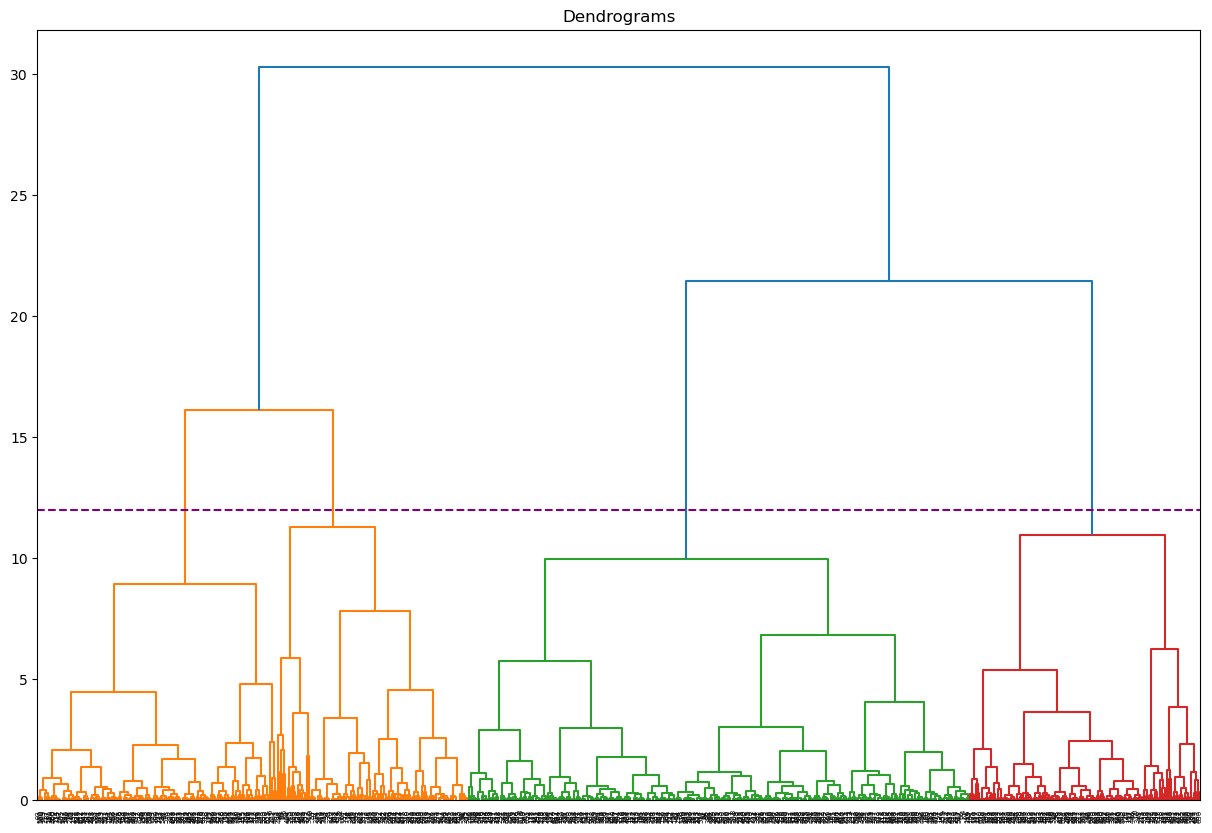

In [29]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
#After observing the dendrogram, if we make a cut at 12 we will have 4 clusters.
plt.axhline(y=12, color='purple', linestyle='--')

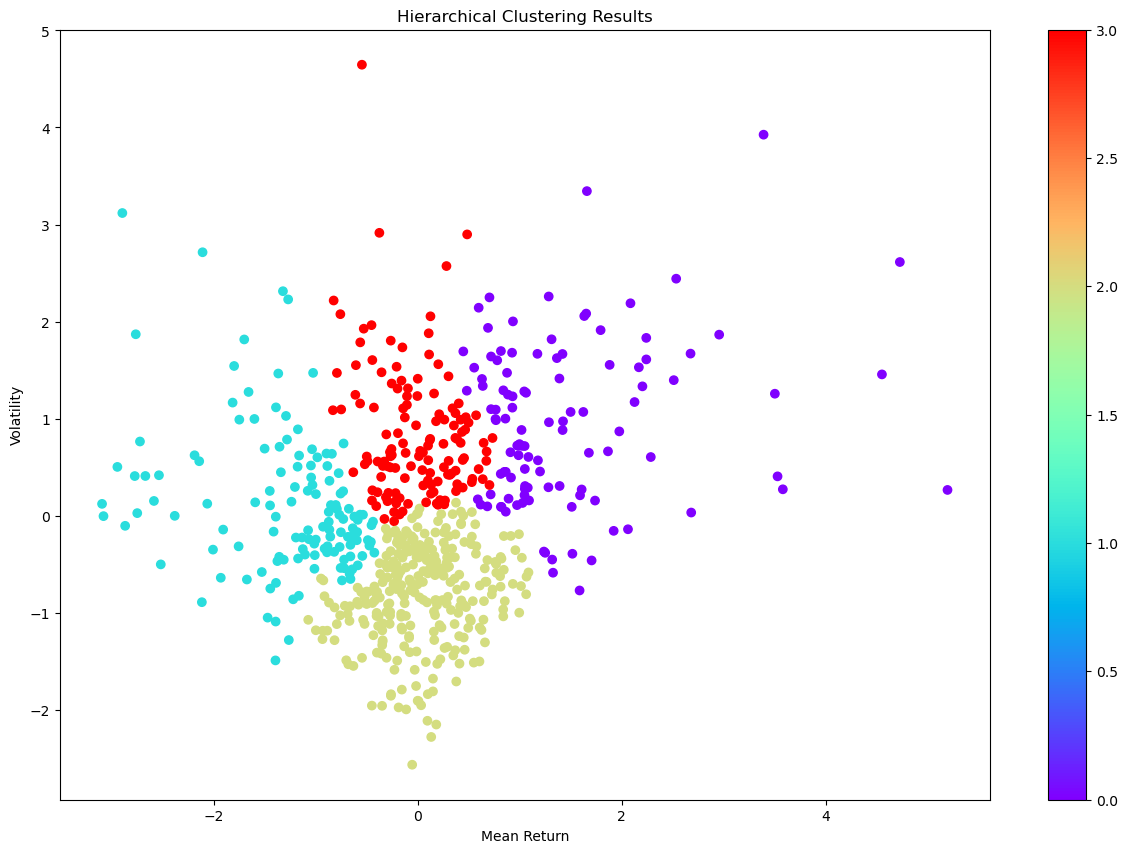

In [30]:
#Fit the model
clusters = 4
hc = AgglomerativeClustering(n_clusters= clusters, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(X)

#Plot the results
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels, cmap='rainbow')
ax.set_title('Hierarchical Clustering Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.show()

In [31]:
%%HTML
<h1>Affinity Propagation Clustering</h1>

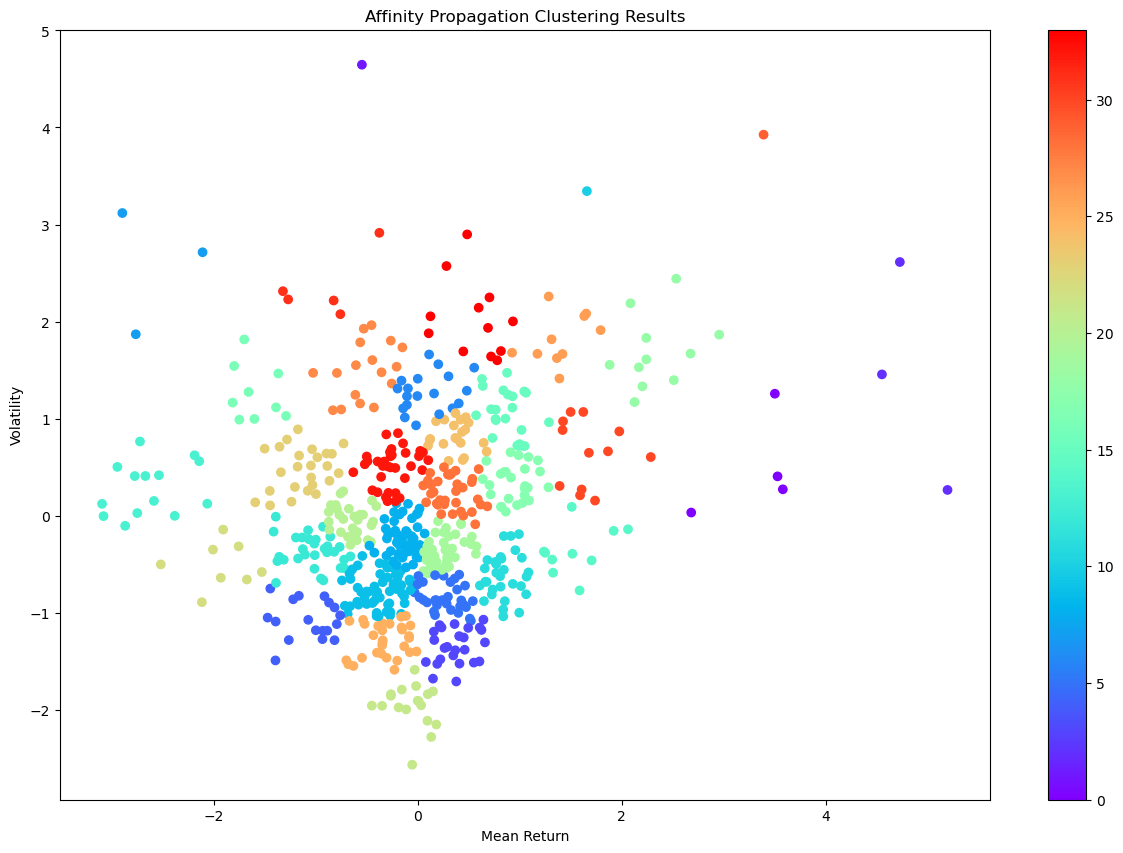

In [32]:
from sklearn.cluster import AffinityPropagation

#Fit the model
ap = AffinityPropagation()
ap.fit(X)
labels1 = ap.predict(X)

#Plot the results
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels1, cmap='rainbow')
ax.set_title('Affinity Propagation Clustering Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.show()

The number of clusters is: 34


<Figure size 640x480 with 0 Axes>

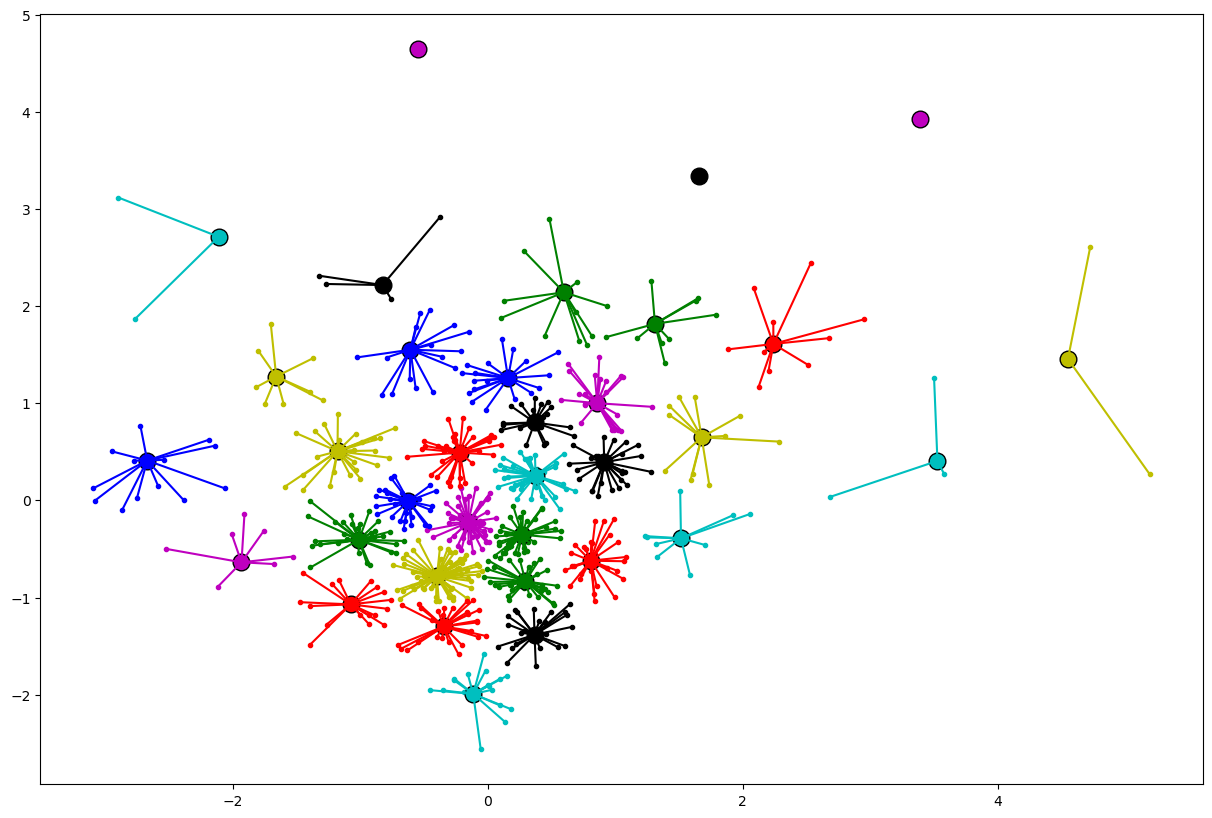

In [33]:
from itertools import cycle

#Extract the cluster centers and labels
cci = ap.cluster_centers_indices_
labels2 = ap.labels_

#Print their number
clusters = len(cci)
print('The number of clusters is:',clusters)

#Plot the results
X_ap = np.asarray(X)
plt.close('all')
plt.figure(1)
plt.clf
fig=plt.figure(figsize=(15,10))
colors = cycle('cmykrgbcmykrgbcmykrgbcmykrgb')
for k, col in zip(range(clusters),colors):
    cluster_members = labels2 == k
    cluster_center = X_ap[cci[k]]
    plt.plot(X_ap[cluster_members, 0], X_ap[cluster_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=12)
    for x in X_ap[cluster_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

In [34]:
%%HTML
<h1>Cluster Evaluation</h1>

In [35]:
from sklearn import metrics
print("km", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print("hc", metrics.silhouette_score(X, hc.fit_predict(X), metric='euclidean'))
print("ap", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

km 0.3723955159482084
hc 0.3302314680174374
ap 0.33557379418913574


In [36]:
%%HTML
<h4>Given that K Means performs best, we proceed with K Means and use the 4 clusters as specified by this method</h4>

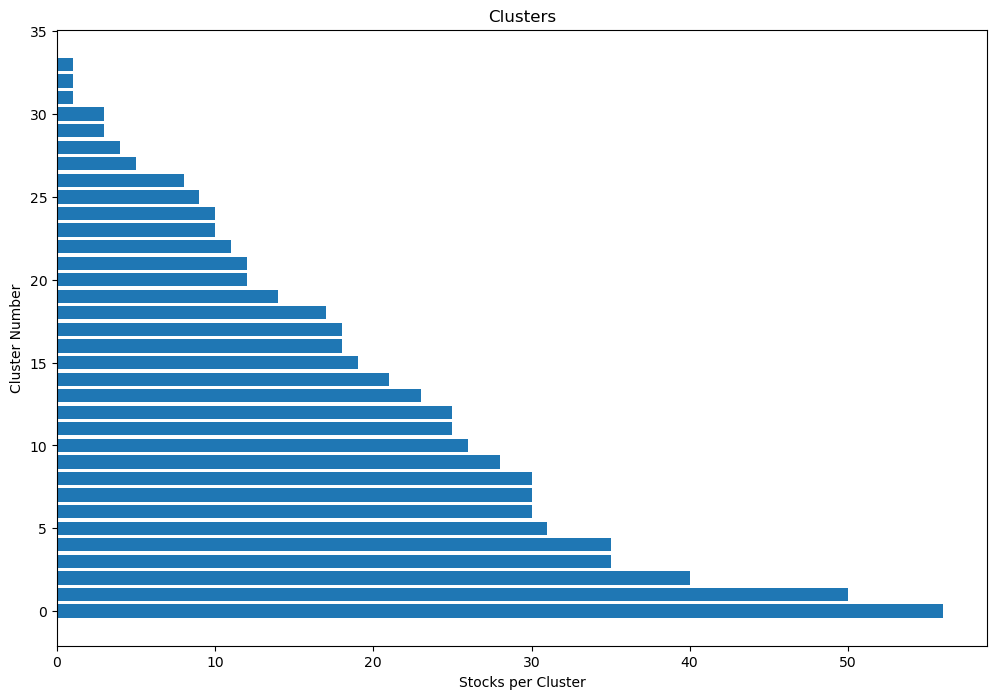

In [37]:
clustered_series = pd.Series(index=X.index, data=ap.labels_.flatten())
clustered_series_all = pd.Series(index=X.index, data=ap.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]
plt.figure(figsize=(12,8))
plt.barh(range(len(clustered_series.value_counts())),clustered_series.value_counts())
plt.title('Clusters')
plt.xlabel('Stocks per Cluster')
plt.ylabel('Cluster Number')
plt.show()

In [38]:
%%HTML
<h1>Pair Selection</h1>

In [39]:
cluster_size_limit = 1000
counts = clustered_series.value_counts()
ticker_count = counts[(counts>1) & (counts<=cluster_size_limit)]
print ("Number of clusters: %d" % len(ticker_count))
print ("Number of Pairs: %d" % (ticker_count*(ticker_count-1)).sum())

Number of clusters: 31
Number of Pairs: 18676


In [40]:
%%HTML
<h3>Cointegration and pair selection function</h3>

In [41]:
def find_cointegrated_pairs(data, significance=0.05):
    # This function is from https://www.quantopian.com/lectures/introduction-to-pairs-trading
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [42]:
from statsmodels.tsa.stattools import coint

cluster_dict = {}

for i, clust in enumerate(ticker_count.index):
    tickers = clustered_series[clustered_series == clust].index
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(data1[tickers])
    cluster_dict[clust] = {}
    cluster_dict[clust]['score_matrix'] = score_matrix
    cluster_dict[clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[clust]['pairs'] = pairs
    
pairs = []   
for cluster in cluster_dict.keys():
    pairs.extend(cluster_dict[cluster]['pairs'])
    
print ("Number of pairs:", len(pairs))
print ("In those pairs, we found %d unique tickers." % len(np.unique(pairs)))
print(pairs)

Number of pairs: 156
In those pairs, we found 178 unique tickers.
[('ALT', 'ASP'), ('ALT', 'BCC'), ('ALT', 'BCG'), ('ALT', 'BIC'), ('ALT', 'BMC'), ('ALT', 'CMC'), ('ALT', 'CSM'), ('ALT', 'CSV'), ('ALT', 'CTI'), ('ALT', 'DAG'), ('ALT', 'DCM'), ('ALT', 'DHC'), ('ALT', 'DQC'), ('ALT', 'EVE'), ('ALT', 'FCN'), ('ALT', 'FPT'), ('ALT', 'GEX'), ('ALT', 'GMD'), ('ALT', 'HTC'), ('ALT', 'IJC'), ('ALT', 'ITC'), ('ALT', 'KBC'), ('ALT', 'KMR'), ('ALT', 'LAS'), ('ALT', 'LBE'), ('ALT', 'LIG'), ('ALT', 'MHC'), ('ALT', 'NAF'), ('ALT', 'NAG'), ('ALT', 'PAC'), ('ALT', 'PDR'), ('ALT', 'PLC'), ('ALT', 'POW'), ('ALT', 'PPC'), ('ALT', 'PPS'), ('ALT', 'PRC'), ('ALT', 'PTB'), ('ALT', 'PVT'), ('ALT', 'QTC'), ('ALT', 'REE'), ('ALT', 'SHA'), ('ALT', 'SMC'), ('ALT', 'SPM'), ('ALT', 'SVC'), ('ALT', 'SZL'), ('ALT', 'TCL'), ('ALT', 'TDH'), ('ALT', 'THG'), ('ALT', 'TLG'), ('ALT', 'TNA'), ('ALT', 'TRC'), ('ALT', 'TTT'), ('ALT', 'VCC'), ('ALT', 'VDP'), ('ALT', 'VLA'), ('ACB', 'VCI'), ('BKC', 'BPC'), ('BKC', 'DHP'), ('BKC

In [43]:
%%HTML
<h1>TSNE Visualization</h1>

In [44]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

stocks = np.unique(pairs)
X_data = pd.DataFrame(index=X.index, data=X).T
in_pairs_series = clustered_series.loc[stocks]
stocks = list(np.unique(pairs))
X_pairs = X_data.T.loc[stocks]
X_pairs.head()

,returns,volatility
Ticker,,
AAA,-1.129,-0.342
AAM,0.955,-0.353
ABT,1.090,0.159
ACB,0.018,-0.300
ADS,-0.231,-1.585


In [45]:
X_tsne = TSNE(init = "random", learning_rate=30, perplexity=5, random_state=42, n_jobs=-1).fit_transform(X_pairs)
X_tsne

array([[-30.111559  ,  20.937895  ],
       [ 22.917976  , -32.861263  ],
       [ 28.90694   , -33.366478  ],
       [  7.6237793 , -13.614932  ],
       [-14.874082  , -36.446846  ],
       [ 28.667952  , -34.57893   ],
       [ -8.030505  ,  -2.428401  ],
       [ -6.204059  ,  35.89473   ],
       [-29.541777  ,  33.736908  ],
       [ 26.420177  , -27.264442  ],
       [ 38.525303  ,  -3.523695  ],
       [ -8.424985  , -29.16708   ],
       [ -0.06822143,  34.75965   ],
       [-10.578262  ,  -1.2468082 ],
       [  6.942287  , -38.269302  ],
       [ -6.0693035 , -13.818956  ],
       [-27.758345  ,   9.1745825 ],
       [  7.2066116 , -16.105389  ],
       [  1.5086212 , -15.528891  ],
       [  6.7411404 , -15.095632  ],
       [-32.151478  ,   9.274537  ],
       [ 30.259504  ,  13.827261  ],
       [ 41.909622  ,  13.289546  ],
       [-38.40735   ,  -1.9289747 ],
       [ 31.914257  ,  23.02512   ],
       [-30.669197  ,  12.981013  ],
       [-28.739313  ,  30.220083  ],
 

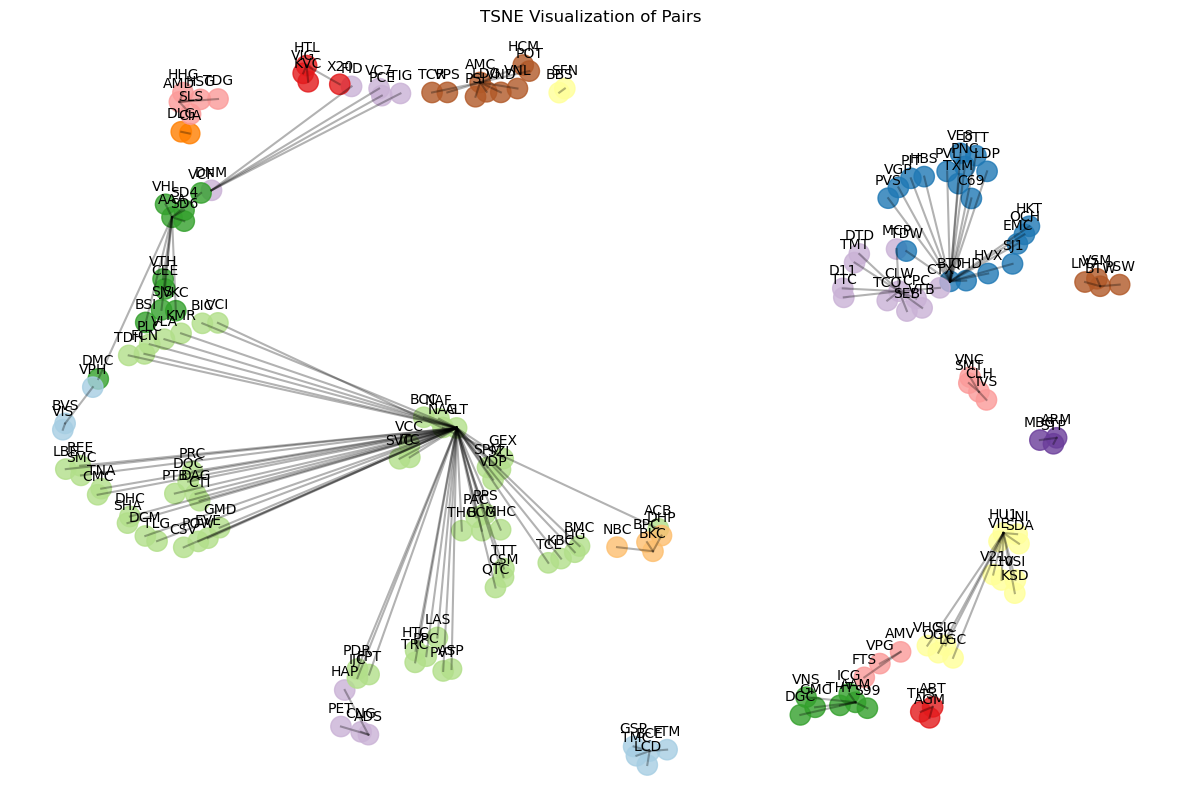

In [46]:
plt.figure(1, facecolor='white',figsize=(15,10))
plt.clf()
plt.axis('off')
for pair in pairs:
    ticker1 = pair[0]
    loc1 = X_pairs.index.get_loc(pair[0])
    x1, y1 = X_tsne[loc1, :]
    ticker2 = pair[1]
    loc2 = X_pairs.index.get_loc(pair[1])
    x2, y2 = X_tsne[loc2, :]
    plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3);
    
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=215, alpha=0.8, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('TSNE Visualization of Pairs'); 

# Join pairs by x and y
for x,y,name in zip(X_tsne[:,0],X_tsne[:,1],X_pairs.index):

    label = name

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
    
plt.show()